## Client Brief

- The client is concerned about retention of its high performing employees and has asked you to investigate how it can improve retention of such colleagues
- The client is also interested in being able to predict exactly which of its employees is most at risk of leaving

## Problem

High performing employees are leaving the company. 

- Why?
- Can we predict who will leave next?
- What can we do about it?

## Objectives

### Strategic Objective: How can we retain more high performing employees?

### Tactical Objectives: 
- How can we predict who will leave? 
- What changes do we need to make to our operating model?

### Operational Objectives:
- Why are people leaving right now?
- What can we do about it? 



## Business Understanding?

- Step 1. Who is leaving the company?
- Step 2. Once we identify who's leaving the company, it will answer the question "Why?"
- Step 3. Once the question "Why?" and "Who?" are answered, we can draw solutions on "what the company can do about it?"
- Step 4. Predict who will leave next. 

### Assumptions

1) Since we haven't been told how the client defines **"high performing employees"** - the following assumptions are made: 
- **low** performing (0 to 0.49)
- **medium** performing (0.50 to 0.74)
- **high** performing (0.75 to 1)

2) The industry where the client operates is not disclosed, hence we will assume that **the standard working week of 40 hours is used as a norm**, whatever is beyond that is considered as a reason for low job satisfaction level - unless the data tells us otherwise. 

3) **Satisfaction_level** assumptions: 
- **low** (0 to 0.49)
- **medium** (0.50 to 0.74)
- **high** (0.75 to 1)

4) **sales** column represents a department employee works in, hence it's been renamed as a **department**

In [1]:
#import libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import data

hr_df = pd.read_csv(r'C:\Users\User\Desktop\ML\Job related folder\Interviews\QuantSPark\HR_comma_sep.csv')

In [4]:
#renaming the column sales
hr_df = hr_df.rename(columns={'sales': 'department'})

In [5]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#check the columns
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [5]:
#shape of the dataset
hr_df.shape

(14999, 10)

In [6]:
#stats
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


From the quick look at the stats above, we can tell that the average satisfaction level is above relatively high at 61% while average performance of the employees is very high at 71%. 

The average monthly hours is around 50h/week, which is higher than expected - this could be a feature we could look into to indetify our "why?", while maximum number in the same column is 310h a month, which makes it into 71h/week - worth flagging this in the further analysis. 

The average time spent in the company is 3.5 years, while the minimum is 2 years - these are good indicators. 

In [20]:
#identifying if there are missing variables
(hr_df.isna().sum()/len(hr_df))*100

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
sales                    0.0
salary                   0.0
dtype: float64

Data is clean - there are no missing values, hence no need to make any imputations. 

In [23]:
#identifying the types of our variables
hr_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In order to work with catgorical variables and do later the encoding ("department" and "salary") we will need to convert the object data types into categorical variables.  

In [35]:
#converting object types into category dtype

to_category = lambda col: col.astype('category')
hr_df[hr_df.select_dtypes(['object']).columns] = hr_df.select_dtypes(['object']).apply(to_category)

In [7]:
#Encoding categorical variables to visualise on histogram
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
hr_df['department_code'] = ord_enc.fit_transform(hr_df[["department"]])
hr_df[["department", "department_code"]].head(11)

,department,department_code
0,sales,7.0
1,sales,7.0
2,sales,7.0
3,sales,7.0
4,sales,7.0
5,sales,7.0
6,sales,7.0
7,sales,7.0
8,sales,7.0
9,sales,7.0


In [9]:
#checking categories in the "sales" variable
hr_df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [10]:
hr_df['department_code'].value_counts()

7.0    4140
9.0    2720
8.0    2229
0.0    1227
6.0     902
5.0     858
1.0     787
2.0     767
3.0     739
4.0     630
Name: department_code, dtype: int64

In [11]:
#Encoding categorical variables to visualise on histogram
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
hr_df['salary_code'] = ord_enc.fit_transform(hr_df[["salary"]])
hr_df[["salary", "salary_code"]].head(11)

,salary,salary_code
0,low,1.0
1,medium,2.0
2,medium,2.0
3,low,1.0
4,low,1.0
5,low,1.0
6,low,1.0
7,low,1.0
8,low,1.0
9,low,1.0


In [12]:
#checking categories in the "sales" variable
hr_df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [13]:
hr_df['salary_code'].value_counts()

1.0    7316
2.0    6446
0.0    1237
Name: salary_code, dtype: int64

In [40]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,salary_code,department_code
0,0.38,0.53,2,157,3,0,1,0,sales,low,1.0,7.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2.0,7.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2.0,7.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,1.0,7.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1.0,7.0


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


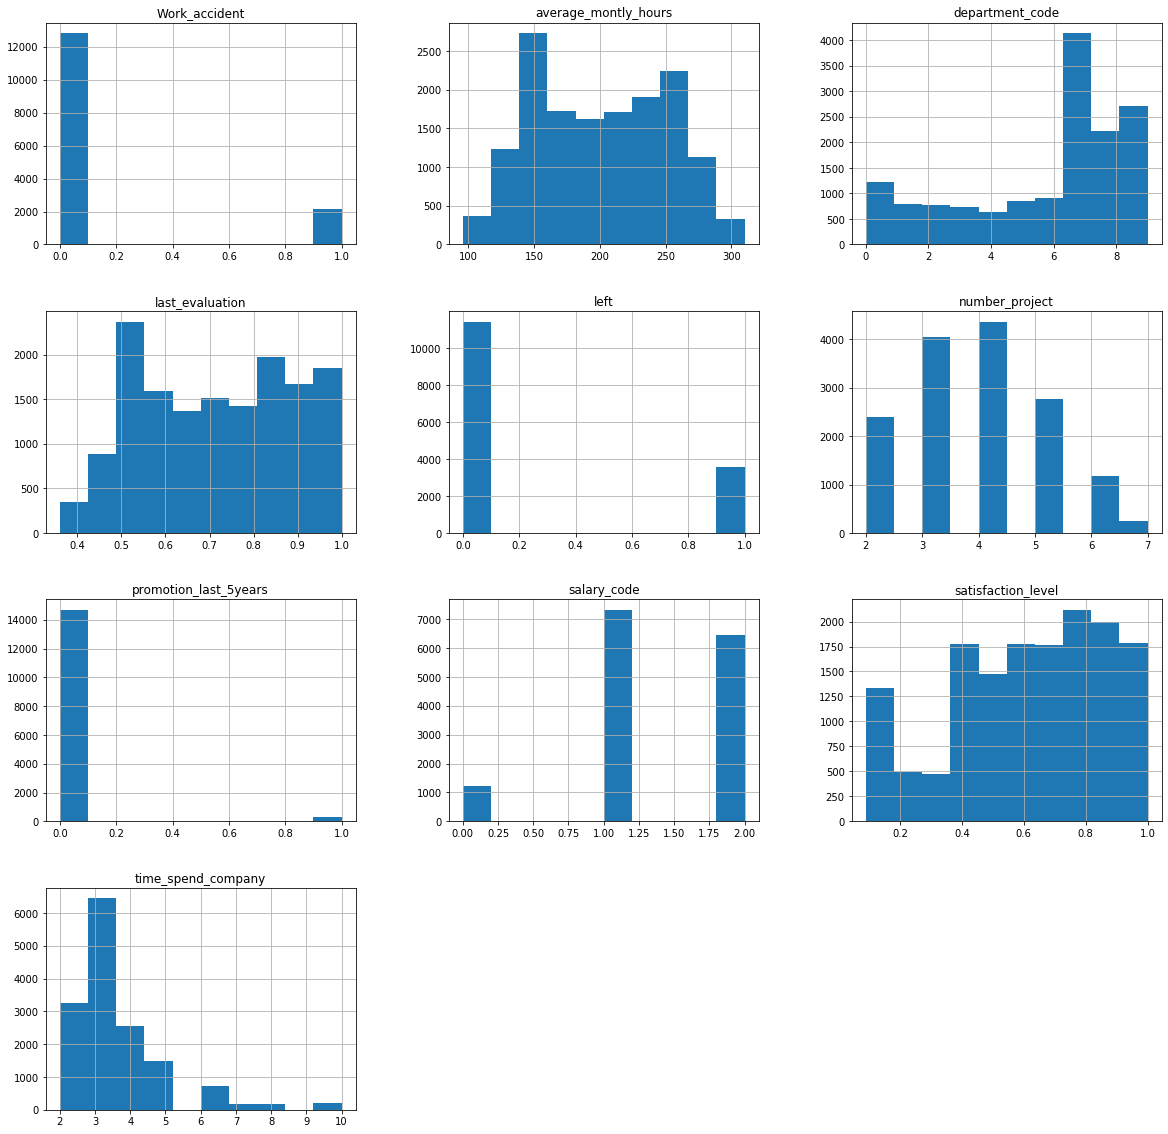

In [43]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
hr_df.hist(ax = ax);

- Work_accident column tells us that the majority of the employees haven't been involved in a work related accident. 
- Average_monthly_hours tells us that over 4K employees work a normal 40h/week, ***while the vast majority of the employees do more than a norm which is 40h/week.*** - this could be a flag we could dig into. 
- Considering our assumption made - ***the half of the employees are the high performing ones.*** This justifies the client's concern on retaining those. 
- The number of employees left is relatively high - this feature will be used in the prediction of the model of our choice. 
- Another important feature is whether or not an employee was promoted in the last 5 years - the graph shows that ***the number of promoted employees is very low*** - this is another feature we will dig into in our analysis. 
- There is a ***high number of employees with a low job satisfaction level*** (almost 10% of employees with the rate between 0 and 0.20), about 50% of employees have a high job satisfaction level. - Perhaps we need to dig on this feature deeper. 
- The ***salary*** column states that the number of low paid employees is exceeding both medium and high paid employees

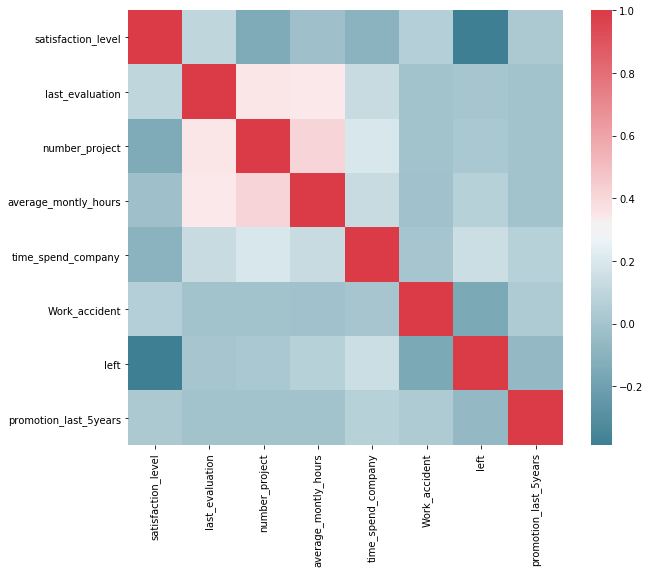

In [19]:
#building a heatmap to visualise the correlation
f, ax = plt.subplots(figsize=(10, 8))
corr = hr_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

There were high hopes for the correlation matrix, so far we can visualize that there is a slight correlation between the hours worked and the number of projects an employee worked on. 

Since the heatmap didn't tell us much, let us have a look at the average of those who **left** and those who didn't as per their charactheristics. 

In [14]:
left = hr_df.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_code,salary_code
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


## Here we can see that those who ***left*** have lower satisfaction level and promotion rates, they also worked more hours in comparison to those who didn't leave the company. 

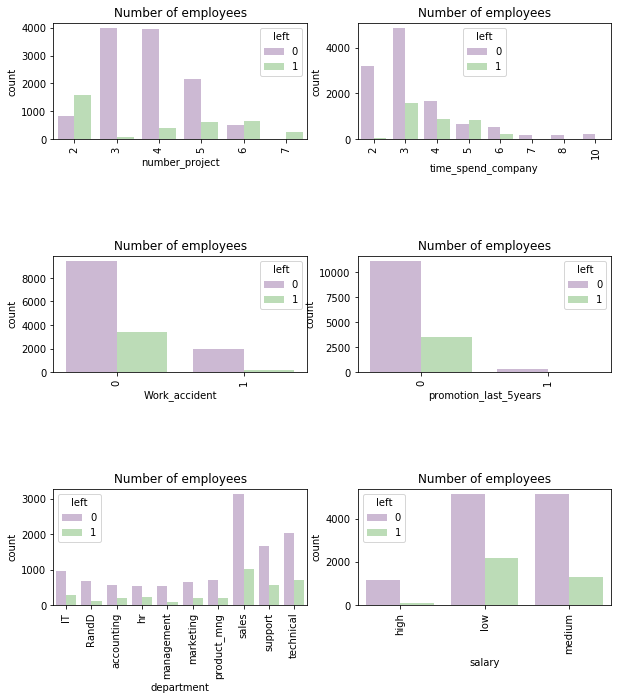

In [71]:
#visualisation of those who left against the characteristics
features=['number_project','time_spend_company','Work_accident','promotion_last_5years','department','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = hr_df, hue='left',palette="PRGn")
    plt.xticks(rotation=90)
    plt.title("Number of employees")

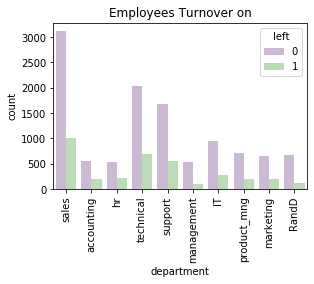

In [42]:
#visualisation of those who left against the characteristics
features=['department']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.3)
    sns.countplot(x=j,data = hr_df, hue='left',palette="PRGn")
    plt.xticks(rotation=90)
    plt.title("Employees Turnover on")

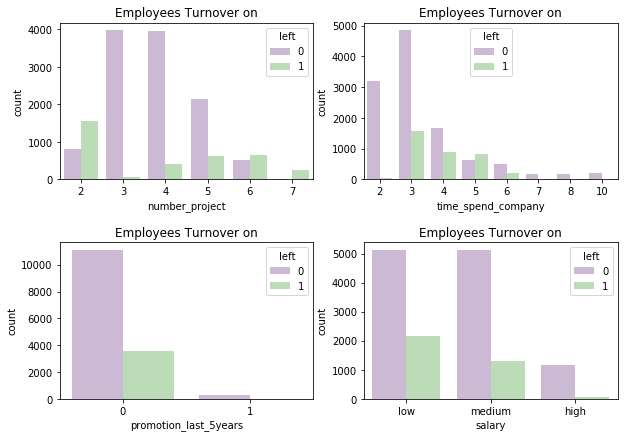

In [41]:
#visualisation of those who left against the characteristics
features=['number_project','time_spend_company','promotion_last_5years','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.4)
    sns.countplot(x=j,data = hr_df, hue='left',palette="PRGn")
    plt.xticks()
    plt.title("Employees Turnover on")

Text(0, 0.5, 'Satisfaction Level')

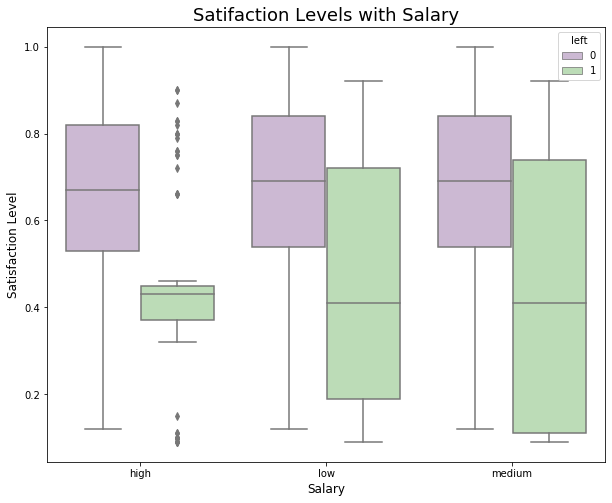

In [66]:
#visualising satisfaction level and salary against those who left
plt.figure(figsize=(10,8))
ax=sns.boxplot(x="salary",y="satisfaction_level",hue="left",data=hr_df,palette="PRGn")
ax.set_title("Satifaction Levels with Salary",fontsize=18)
ax.set_xlabel("Salary",fontsize=12)
ax.set_ylabel("Satisfaction Level",fontsize=12)

Text(0, 0.5, 'Average Monthly Hours')

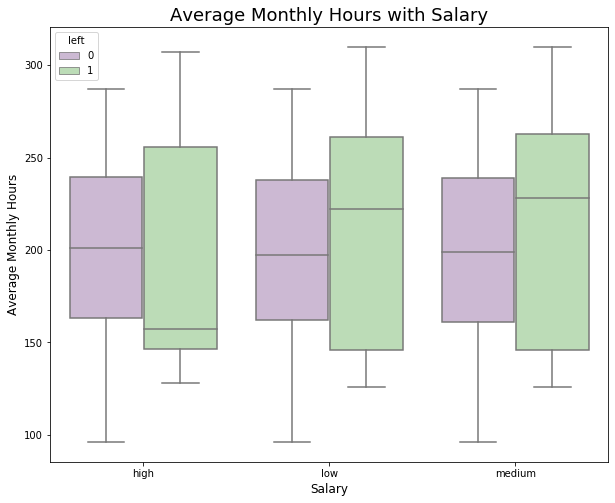

In [69]:
#visualising satisfaction level and salary against those who left
plt.figure(figsize=(10,8))
ax=sns.boxplot(x="salary",y="average_montly_hours",hue="left",data=hr_df,palette="PRGn")
ax.set_title("Average Monthly Hours with Salary",fontsize=18)
ax.set_xlabel("Salary",fontsize=12)
ax.set_ylabel("Average Monthly Hours",fontsize=12)

## Findings

- There is a high level of employees who left the company with 2,6 and 7 number of projects, while those who had 3,4 and 5 projects tend to stay in the company; 
- People tend to leave the company with 3,4 and 5 years spent in the company - which could be explained with the low promotion rates across the company. 
- There is a high rate of employees leaving the company who works in sales, followed by technical and support departments. 
- There is also a strong correlation with the number of people leaving that have low and medium salary range as opposed to those with the high salary. 
- Those who leave the company have lower satisfaction levels, irrespective the salary range. 
- Those who leave the company also have more working hours a calendar month as opposed to those who stayed in the company. 

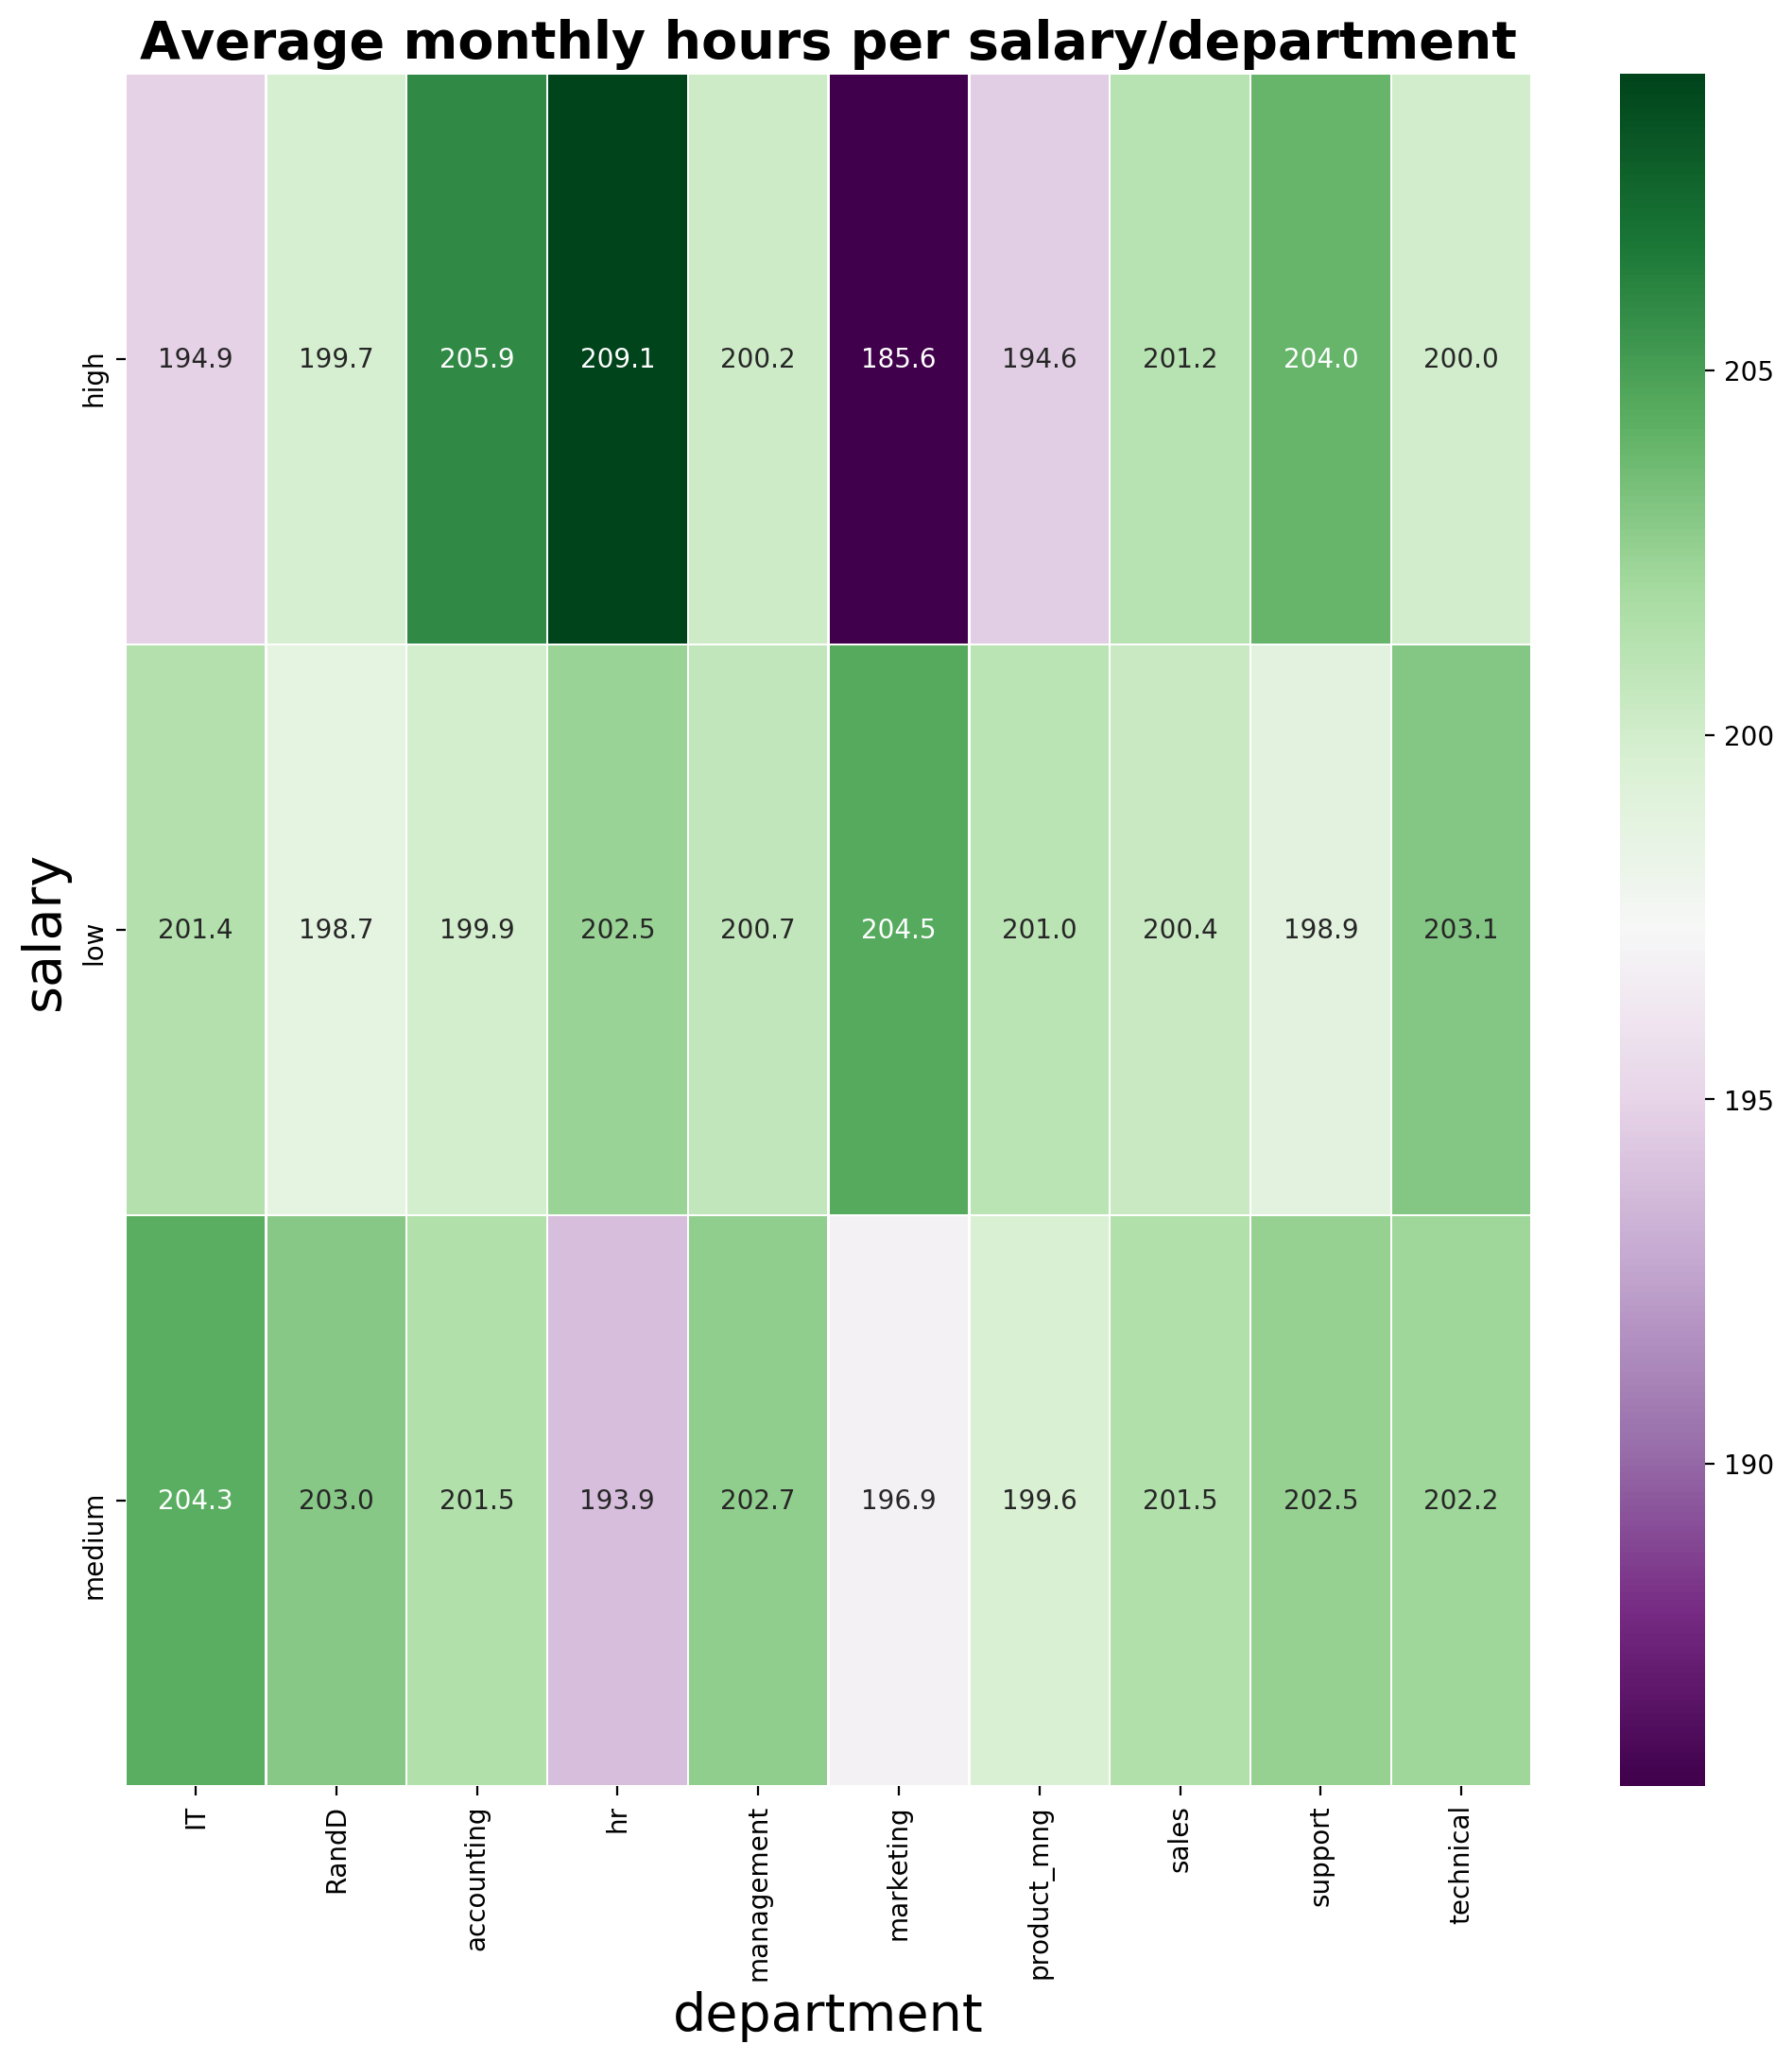

In [70]:
#Visualising the working hours per department and salary
plt.figure(figsize=(12,12), dpi=200)
plt.title('Average monthly hours per salary/department', weight ='bold', size = 20);
plt.xlabel('room_type', size = 20)
plt.ylabel('property_type', size = 20)
sns.heatmap(hr_df.groupby(['salary','department']).average_montly_hours.mean().unstack(), annot=True, fmt='.1f', linewidths= .5, cmap='PRGn')

# Prediction

Since the goal is to build a model that can accurately predict the outcome based on the number of features, it is a supervised learning, hence we will try basic **Linear regression model** against more somphisticated ones below.

In [43]:
#assigning features and the target_variable
X=hr_df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department_code', 'salary_code']]
y=hr_df['left']

from sklearn.model_selection import train_test_split

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)


#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

#Print training and testing score
print("The rsquared on the training data is {}.  The rsquared on the test data is {}.".format(train_score, test_score))

The rsquared on the training data is 0.19799095311589698.  The rsquared on the test data is 0.1838877548538752.


As we can see, the linear regression model performed poor on both training and test data. Lets try the **Random Forest model** below.

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as RFC
rfc_b = RFC()
rfc_b.fit(X_train,y_train)
y_pred = rfc_b.predict(X_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,rfc_b.predict(X_test)))

Train accuracy score: 1.0
Test accuracy score: 0.9884444444444445


Random Forest model shows very good results, let's compare the results from the **Gradient Boosting Classifier**

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_train)
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Test Accuracy:",metrics.accuracy_score(y_test, gbc.predict(X_test)))

Train Accuracy: 0.9790456233927041
Test Accuracy: 0.9713333333333334


In [93]:

## Let us see 10 random picked true price values and predicted price values
compare_df = pd.DataFrame({'y_test': y_test, 'y_predict': gbc.predict(X_test)})
ind = np.random.choice(len(compare_df), 10, replace=False)
compare_df.iloc[ind]

,y_test,y_predict
11376,0,0
7695,0,0
4953,0,0
13306,0,0
8518,0,0
11274,0,0
13544,0,0
14671,1,1
14478,1,1
14041,0,0


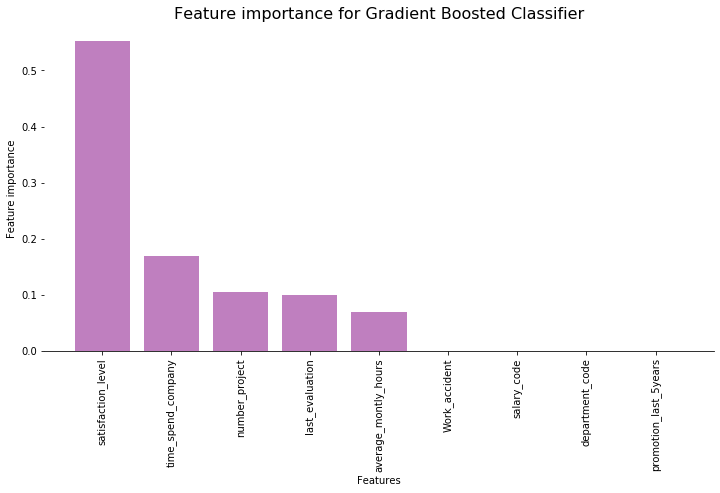

In [47]:
## visualize it
features = sorted(zip(gbc.feature_importances_, X_train.columns), reverse=True)
attr = []
coef = []
number = 10

for feature in features:
    attr.append(feature[1]) 
    coef.append(feature[0])

plt.figure(figsize=(12,6))
ax = plt.subplot()
ax.bar(attr[:number], height=coef[:number], color='purple', alpha=0.5)
sns.despine(top=True, right=True, left=True)
ax.xaxis.grid(False)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature importance')
plt.title('Feature importance for Gradient Boosted Classifier'.format(number), fontsize=16)
plt.show()

## print features
#print("Top {} important features:\n {}".format(number, attr[:number]))

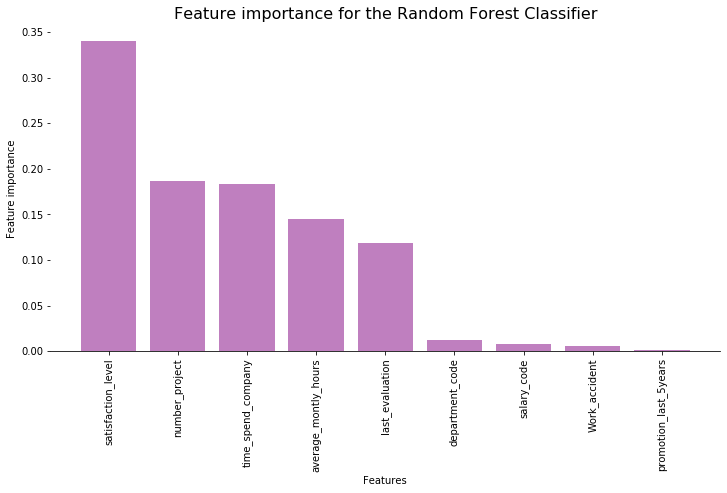

In [49]:
## visualize it
features = sorted(zip(rfc_b.feature_importances_, X_train.columns), reverse=True)
attr = []
coef = []
number = 10

for feature in features:
    attr.append(feature[1]) 
    coef.append(feature[0])

plt.figure(figsize=(12,6))
ax = plt.subplot()
ax.bar(attr[:number], height=coef[:number], color='purple', alpha=0.5)
sns.despine(top=True, right=True, left=True)
ax.xaxis.grid(False)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature importance')
plt.title('Feature importance for the Random Forest Classifier'.format(number), fontsize=16)
plt.show()

## print features
#print("Top {} important features:\n {}".format(number, attr[:number]))

In [ ]:
#visualising satisfaction level and salary against those who left
plt.figure(figsize=(10,8))
ax=sns.boxplot(x="salary",y="satisfaction_level",hue="left",data=hr_df,palette="PRGn")
ax.set_title("Satifaction Levels with Salary",fontsize=18)
ax.set_xlabel("Salary",fontsize=12)
ax.set_ylabel("Satisfaction Level",fontsize=12)

Text(0.5, 1, 'Satisfaction Vs Left')

<Figure size 864x576 with 0 Axes>

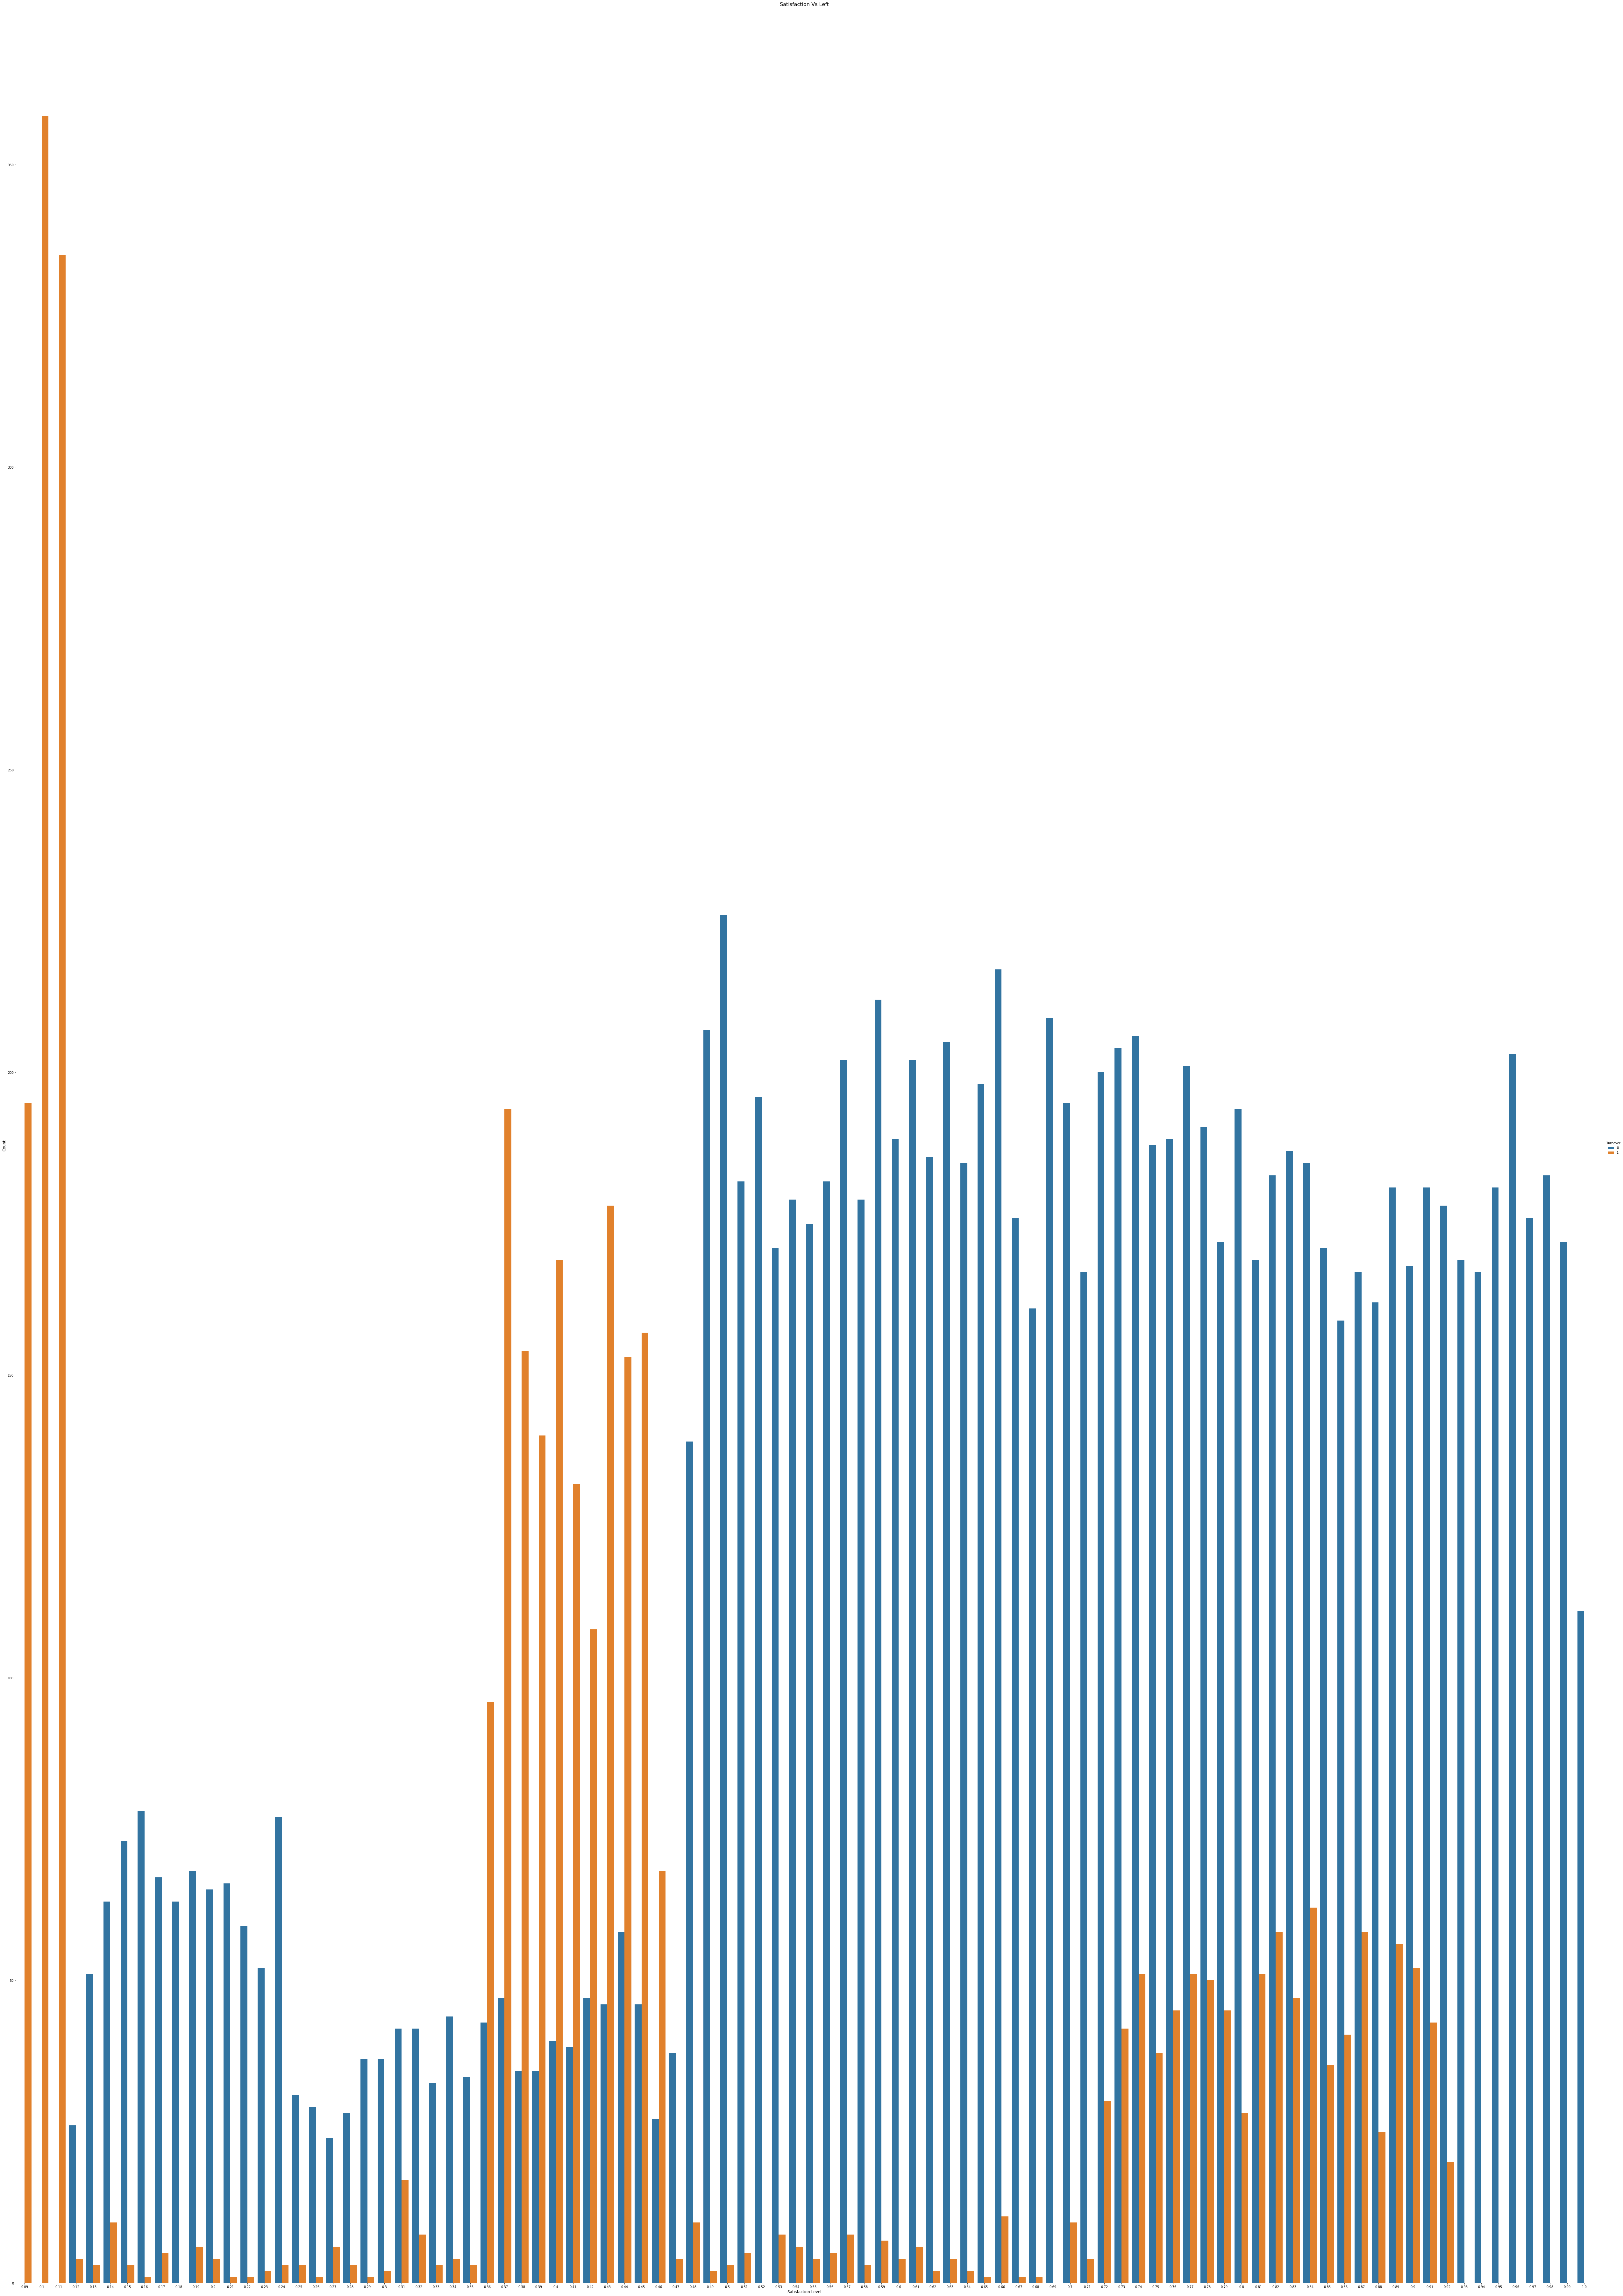

In [99]:
fig=plt.figure(figsize=(12,8))
g=sns.factorplot(x="satisfaction_level",hue="left",data=hr_df,kind="count",legend_out=True,height=100,aspect=0.7)
g._legend.set_title("Turnover")
plt.xlabel("Satisfaction Level",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Satisfaction Vs Left",fontsize=16)

Text(0.5, 1.0, 'Employee Left with Satisfaction Level')

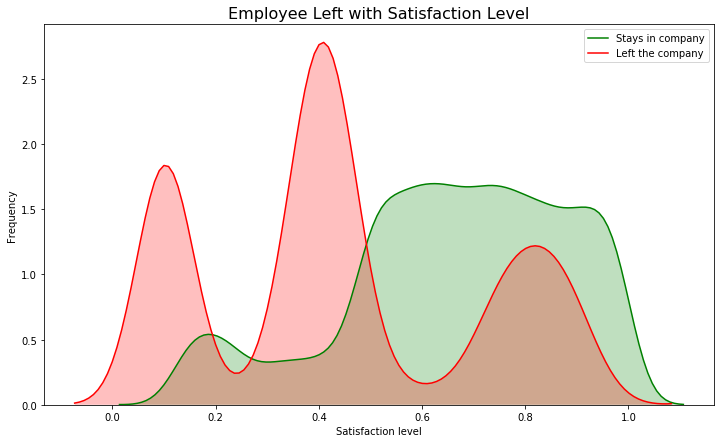

In [101]:
plt.figure(figsize=(12,7))
ax=sns.kdeplot(hr_df.loc[(hr_df.left==0),'satisfaction_level'],color="g",shade=True,label="Stays in company")
ax=sns.kdeplot(hr_df.loc[(hr_df.left==1),'satisfaction_level'],color="r",shade=True,label="Left the company")
ax.set(xlabel='Satisfaction level',ylabel="Frequency")
plt.title("Employee Left with Satisfaction Level",fontsize=16)

Text(0.5, 1.0, 'Boxplot of Satisfaction Level with Number of Projects')

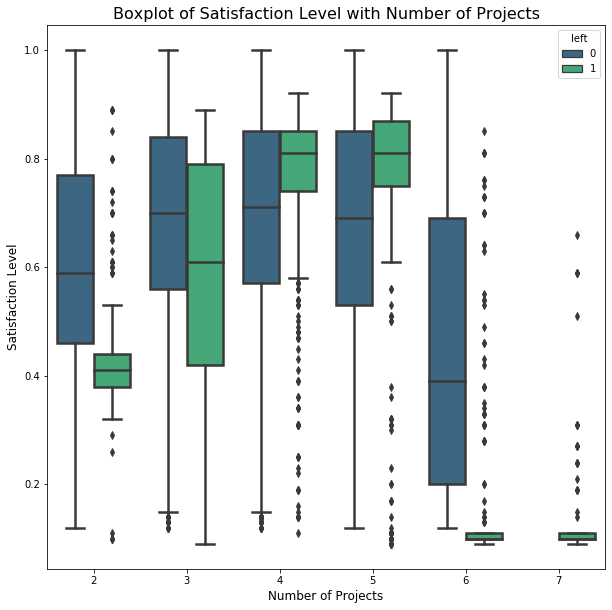

In [102]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(x="number_project",y="satisfaction_level",hue="left",data=hr_df,palette='viridis',linewidth=2.5)
plt.xlabel("Number of Projects",fontsize=12)
plt.ylabel("Satisfaction Level",fontsize=12)
plt.title("Boxplot of Satisfaction Level with Number of Projects",fontsize=16)

In [67]:
def perform_groups(row):
    if row['last_evaluation'] < 0.75:
        return 'low & medium performing'
    elif row['last_evaluation'] >=0.75:
        return 'high performing'
    
# apply to dataframe, use axis=1 to apply the function to every row
hr_df['perform_groups'] = hr_df.apply(perform_groups, axis=1)
hr_df[['last_evaluation', 'perform_groups']].head()

,last_evaluation,perform_groups
0,0.53,low & medium performing
1,0.86,high performing
2,0.88,high performing
3,0.87,high performing
4,0.52,low & medium performing


Text(0.5, 1.0, 'Satisfaction Level with Years Worked')

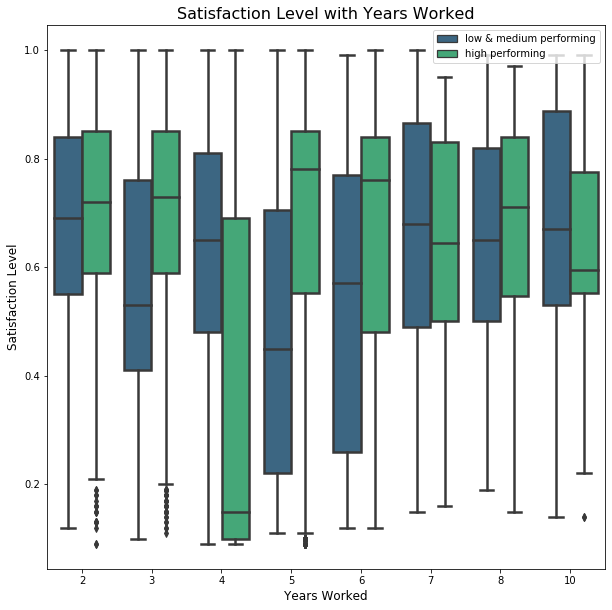

In [75]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(x="time_spend_company",y="satisfaction_level",hue='perform_groups',data=hr_df,palette='viridis',linewidth=2.5)
plt.xlabel("Years Worked",fontsize=12)
plt.ylabel("Satisfaction Level",fontsize=12)
plt.legend(loc='upper right')
plt.title("Satisfaction Level with Years Worked",fontsize=16)

Text(0.5, 1.0, 'Satisfaction Level with Number of Projects')

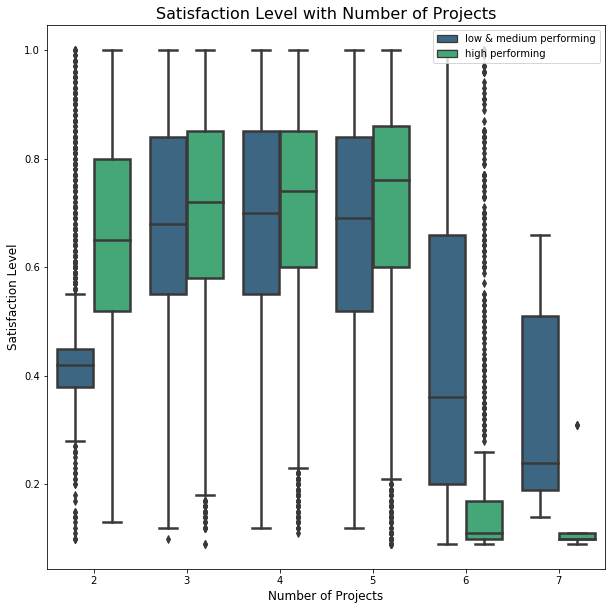

In [76]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(x="number_project",y="satisfaction_level",hue='perform_groups',data=hr_df,palette='viridis',linewidth=2.5)
plt.xlabel("Number of Projects",fontsize=12)
plt.ylabel("Satisfaction Level",fontsize=12)
plt.legend(loc='upper right')
plt.title("Satisfaction Level with Number of Projects",fontsize=16)

Text(0.5, 1.0, 'Satisfaction Level with Salary')

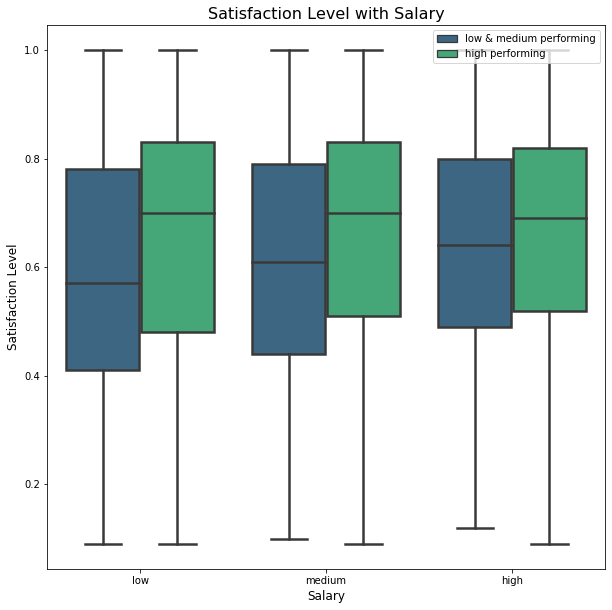

In [79]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(x="salary",y="satisfaction_level",hue='perform_groups',data=hr_df,palette='viridis',linewidth=2.5)
plt.xlabel("Salary",fontsize=12)
plt.ylabel("Satisfaction Level",fontsize=12)
plt.legend(loc='upper right')
plt.title("Satisfaction Level with Salary",fontsize=16)

Text(0.5, 1.0, 'Satisfaction Level with Hours Worked')

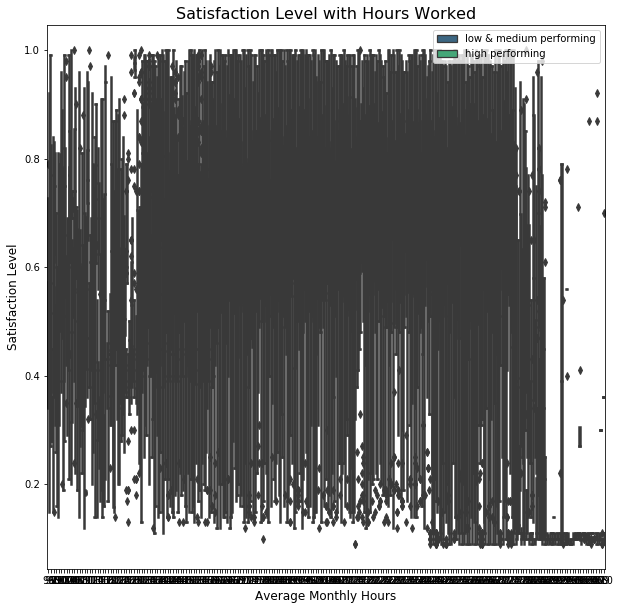

In [77]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(x="average_montly_hours",y="satisfaction_level",hue='perform_groups',data=hr_df,palette='viridis',linewidth=2.5)
plt.xlabel("Average Monthly Hours",fontsize=12)
plt.ylabel("Satisfaction Level",fontsize=12)
plt.legend(loc='upper right')
plt.title("Satisfaction Level with Hours Worked",fontsize=16)

Text(0.5, 1.0, 'Boxplot of Satisfaction Level with Promotion level')

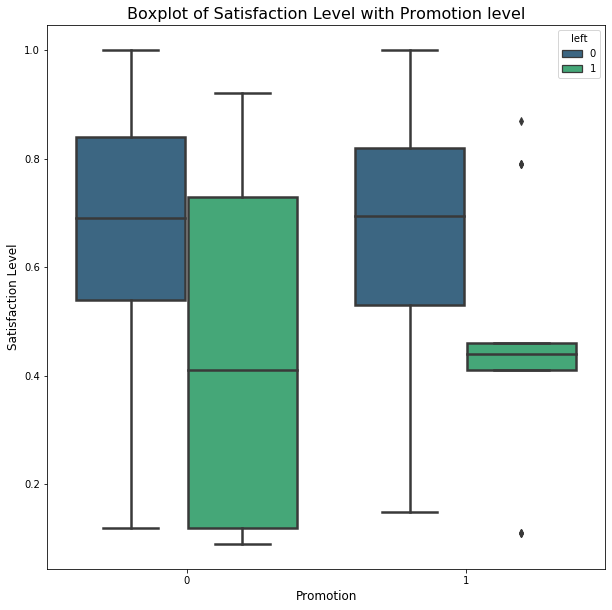

In [23]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(x="promotion_last_5years",y="satisfaction_level",hue="left",data=hr_df,palette='viridis',linewidth=2.5)
plt.xlabel("Promotion",fontsize=12)
plt.ylabel("Satisfaction Level",fontsize=12)
plt.title("Boxplot of Satisfaction Level with Promotion level",fontsize=16)

Text(0.5, 1.0, 'High Performing vs Low Performing Number of Projects')

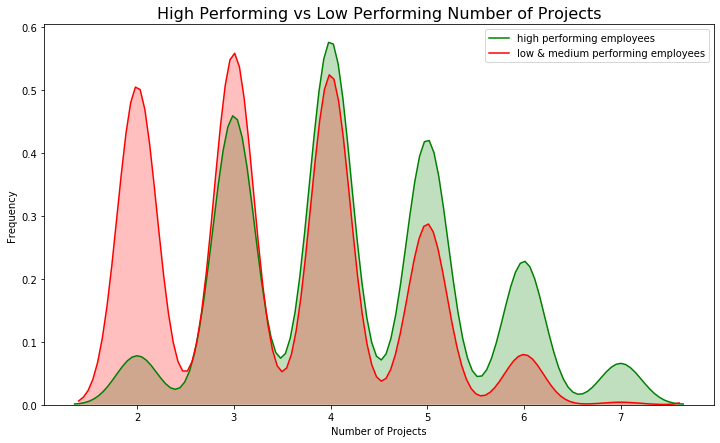

In [29]:
plt.figure(figsize=(12,7))
ax=sns.kdeplot(hr_df.loc[(hr_df.last_evaluation>0.75),'number_project'],color="g",shade=True,label="high performing employees")
ax=sns.kdeplot(hr_df.loc[(hr_df.last_evaluation<0.75),'number_project'],color="r",shade=True,label="low & medium performing employees")
ax.set(xlabel='Number of Projects',ylabel="Frequency")
plt.title("High Performing vs Low Performing Number of Projects",fontsize=16)

Text(0.5, 1.0, 'High Performing vs Low Performing in Satisfaction Level')

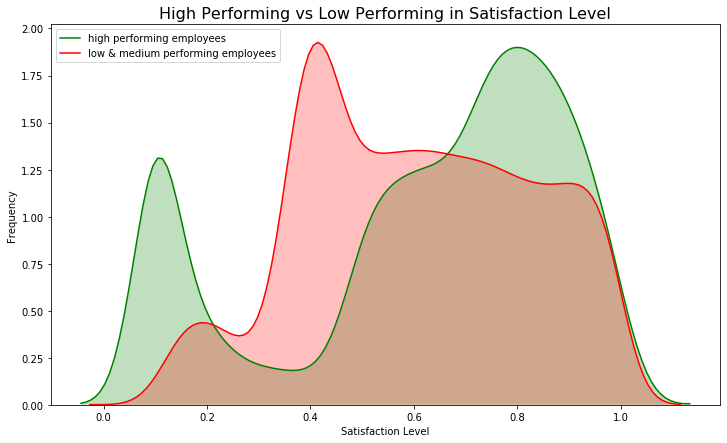

In [63]:
plt.figure(figsize=(12,7))
ax=sns.kdeplot(hr_df.loc[(hr_df.last_evaluation>0.75),'satisfaction_level'],color="g",shade=True,label="high performing employees")
ax=sns.kdeplot(hr_df.loc[(hr_df.last_evaluation<0.75),'satisfaction_level'],color="r",shade=True,label="low & medium performing employees")
ax.set(xlabel='Satisfaction Level',ylabel="Frequency")
plt.title("High Performing vs Low Performing in Satisfaction Level",fontsize=16)

Text(0.5, 1.0, 'High Performing vs Low Performing average hours a month')

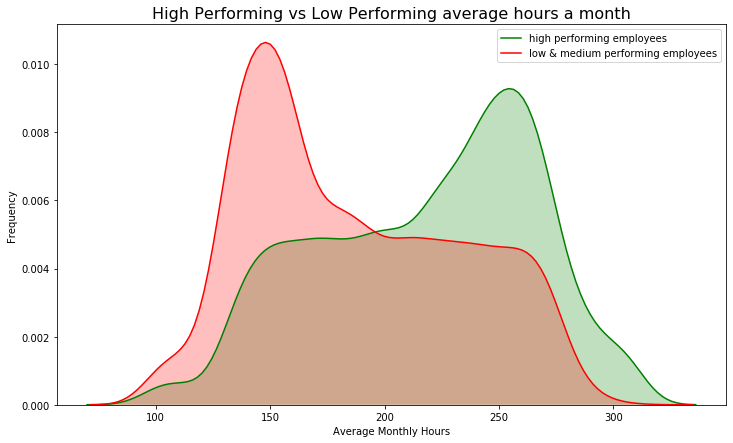

In [27]:
plt.figure(figsize=(12,7))
ax=sns.kdeplot(hr_df.loc[(hr_df.last_evaluation>0.75),'average_montly_hours'],color="g",shade=True,label="high performing employees")
ax=sns.kdeplot(hr_df.loc[(hr_df.last_evaluation<0.75),'average_montly_hours'],color="r",shade=True,label="low & medium performing employees")
ax.set(xlabel='Average Monthly Hours',ylabel="Frequency")
plt.title("High Performing vs Low Performing average hours a month",fontsize=16)

TypeError: fill_between() missing 1 required positional argument: 'y1'

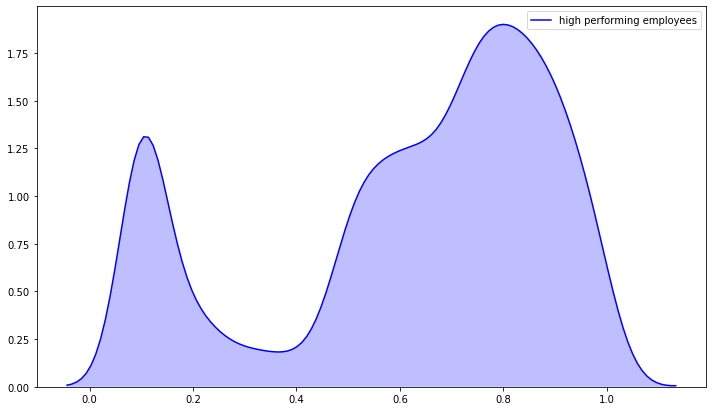

In [60]:
#x=hr_df.loc[(hr_df.last_evaluation>0.75)
#y=
plt.figure(figsize=(12,7))
ax=sns.kdeplot(hr_df.loc[(hr_df.last_evaluation>0.75),'satisfaction_level'],color="b",shade=True,label="high performing employees")
ax.fill_between(hr_df.loc[(hr_df.last_evaluation>0.75),'satisfaction_level'], where=hr_df.loc[(hr_df.satisfaction_level<0.75)], interpolate=True, color='#EF9A9A')
ax.set(xlabel='Satisfaction_level',ylabel="Frequency")
plt.title("High Performing Satisfaction Level",fontsize=16)

Text(0.5, 1.0, 'High Performing Work Load')

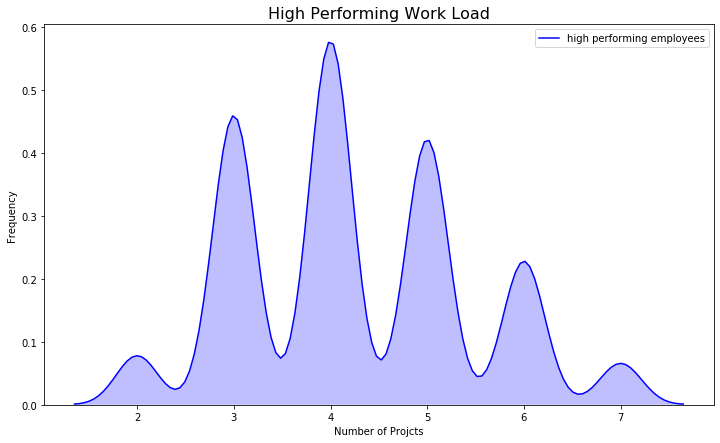

In [53]:
plt.figure(figsize=(12,7))
ax=sns.kdeplot(hr_df.loc[(hr_df.last_evaluation>0.75),'number_project'],color="b",shade=True,label="high performing employees")
ax.set(xlabel='Number of Projcts',ylabel="Frequency")
plt.title("High Performing Work Load",fontsize=16)

Text(0.5, 1.0, 'High Performing Years Worked')

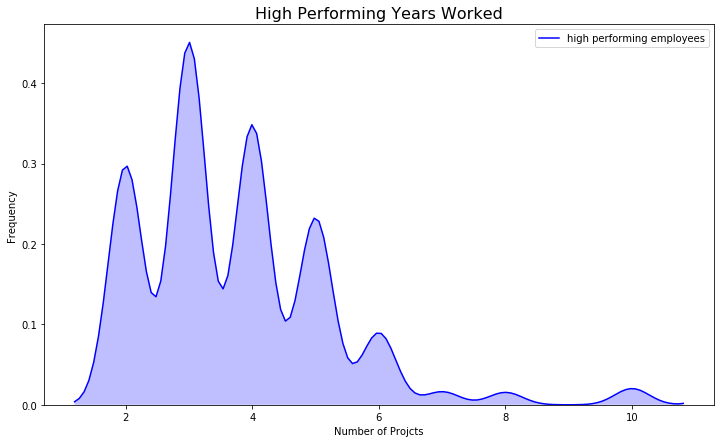

In [55]:
plt.figure(figsize=(12,7))
ax=sns.kdeplot(hr_df.loc[(hr_df.last_evaluation>0.75),'time_spend_company'],color="b",shade=True,label="high performing employees")
ax.set(xlabel='Number of Projcts',ylabel="Frequency")
plt.title("High Performing Years Worked",fontsize=16)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

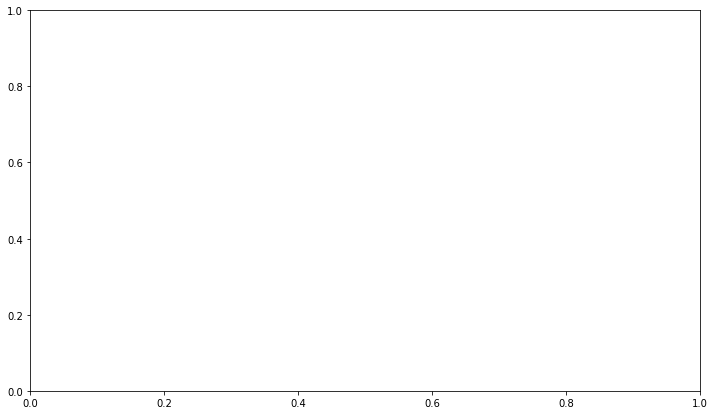

Text(0.5, 1.0, 'High Performing vs Low Performing Salary')

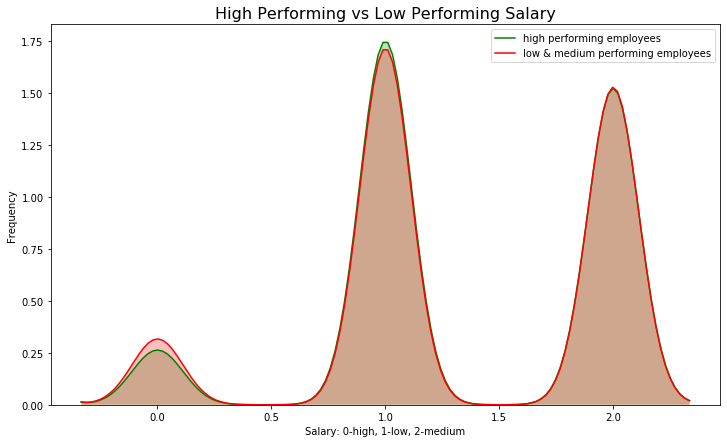

In [32]:
plt.figure(figsize=(12,7))
ax=sns.kdeplot(hr_df.loc[(hr_df.last_evaluation>0.75),'salary_code'],color="g",shade=True,label="high performing employees")
ax=sns.kdeplot(hr_df.loc[(hr_df.last_evaluation<0.75),'salary_code'],color="r",shade=True,label="low & medium performing employees")
ax.set(xlabel='Salary: 0-high, 1-low, 2-medium',ylabel="Frequency")
plt.title("High Performing vs Low Performing Salary",fontsize=16)

Text(0.5, 1.0, 'High Performing vs Low Performing Satisfaction')

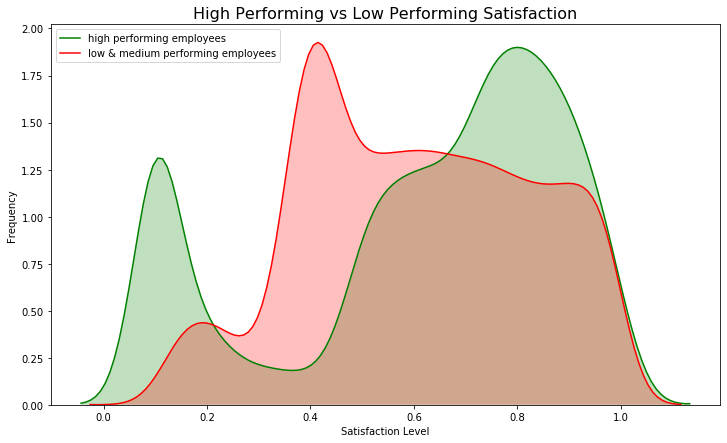

In [34]:
plt.figure(figsize=(12,7))
ax=sns.kdeplot(hr_df.loc[(hr_df.last_evaluation>0.75),'satisfaction_level'],color="g",shade=True,label="high performing employees")
ax=sns.kdeplot(hr_df.loc[(hr_df.last_evaluation<0.75),'satisfaction_level'],color="r",shade=True,label="low & medium performing employees")
ax.set(xlabel='Satisfaction Level',ylabel="Frequency")
plt.title("High Performing vs Low Performing Satisfaction",fontsize=16)

Text(0.5, 1.0, 'Satisfaction Level by Hours worked')

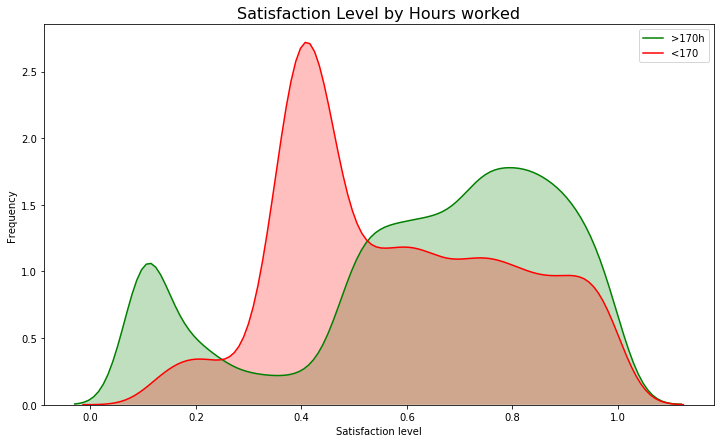

In [108]:
plt.figure(figsize=(12,7))
ax=sns.kdeplot(hr_df.loc[(hr_df.average_montly_hours>170),'satisfaction_level'],color="g",shade=True,label=">170h")
ax=sns.kdeplot(hr_df.loc[(hr_df.average_montly_hours<170),'satisfaction_level'],color="r",shade=True,label="<170")
ax.set(xlabel='Satisfaction level',ylabel="Frequency")
plt.title("Satisfaction Level by Hours worked",fontsize=16)

In [109]:
#there is a spike at those who work less hours and how lower satisfaction rate, but those who work more hours tend to be more satisfied than those who work less hours

Text(0.5, 1.0, 'Satisfaction Level by Salary')

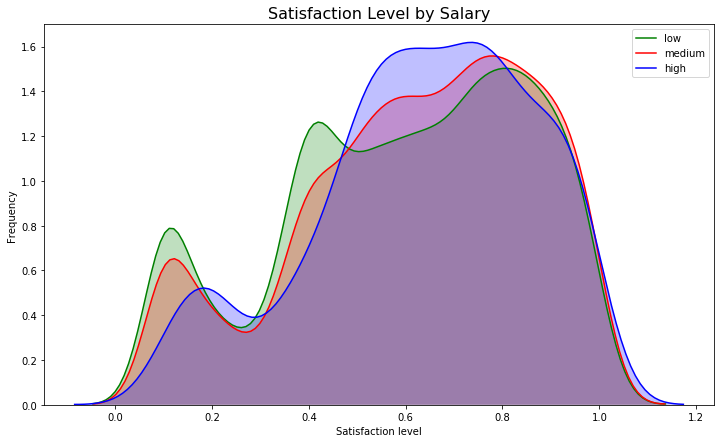

In [106]:
plt.figure(figsize=(12,7))
ax=sns.kdeplot(hr_df.loc[(hr_df.salary=='low'),'satisfaction_level'],color="g",shade=True,label="low")
ax=sns.kdeplot(hr_df.loc[(hr_df.salary=='medium'),'satisfaction_level'],color="r",shade=True,label="medium")
ax=sns.kdeplot(hr_df.loc[(hr_df.salary=='high'),'satisfaction_level'],color="b",shade=True,label="high")
ax.set(xlabel='Satisfaction level',ylabel="Frequency")
plt.title("Satisfaction Level by Salary",fontsize=16)

In [ ]:
#less people unsatisfied with high pay than medium and low

Text(0, 0.5, 'Time Spent')

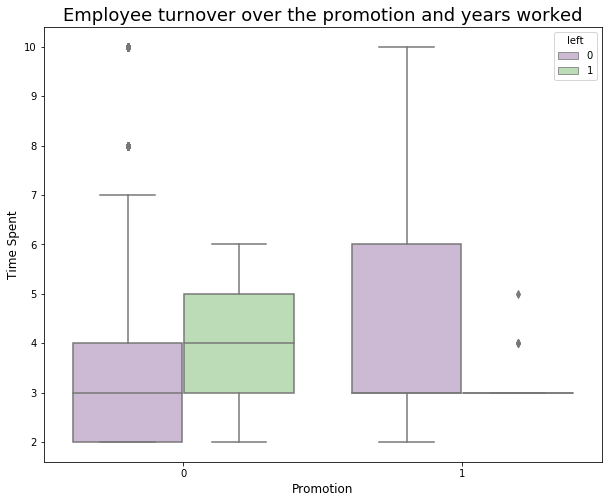

In [18]:
#visualising satisfaction level and salary against those who left
plt.figure(figsize=(10,8))
ax=sns.boxplot(x="promotion_last_5years",y="time_spend_company",hue="left",data=hr_df,palette="PRGn")
ax.set_title("Employee turnover over the promotion and years worked",fontsize=18)
ax.set_xlabel("Promotion",fontsize=12)
ax.set_ylabel("Time Spent",fontsize=12)

In [ ]:
#those who worked 3-6 years and got promoted in the last 5 years, didn't leave the company 
#those who didn't get promoted and worked 3-5 years, left. 